## Breast Cancer

- Confusion Matrix
- Cutoff (Threshold)
- ROC Curve
- ROC Curve (sklearn)
- Cross Validation
- Stratified Cross Validation
- Learning Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df['target'] = data.target

In [6]:
df['target_name'] = df['target'].apply(lambda x: data.target_names[x])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


## Train and Test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-2], df.iloc[:,-2], test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

## 1. Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
log_reg = LogisticRegression(solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [13]:
log_reg.score(X_test, y_test)

0.956140350877193

In [14]:
y_pred_test = log_reg.predict(X_test)

### Confusion Matrix

In [15]:
# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
conf_mat

array([[39,  4],
       [ 1, 70]], dtype=int64)

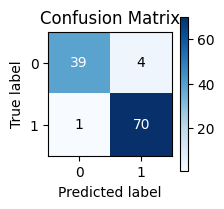

In [16]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, figsize=(2, 2))
plt.show()

### Metrics

In [17]:
# Accuracy, Sensitivity, Specificity and Precision using the confusion matrix.
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.956
Sensitvity  = 0.986
Specificity = 0.907
Precision   = 0.946


In [18]:
# Alternative way.
accuracy = metrics.accuracy_score(y_test,y_pred_test)                     
# Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(y_test,y_pred_test)
precision = metrics.precision_score(y_test,y_pred_test)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.956
Sensitvity  = 0.986
Precision   = 0.946


### Cutoff (threshold)

In [19]:
# Predict the probability of Y = 1
y_pred_test_prob = log_reg.predict_proba(X_test)[:,1]

In [20]:
# One can change the cutoff at will
cutoff = 0.7                                                      # cutoff can be a value between 0 and 1.
Y_pred_test_val = (y_pred_test_prob > cutoff).astype(int)
conf_mat = metrics.confusion_matrix(y_test,Y_pred_test_val)
print(conf_mat)

[[42  1]
 [ 1 70]]


In [21]:
accuracy = metrics.accuracy_score(y_test,y_pred_test)                     
sensitivity = metrics.recall_score(y_test,y_pred_test)
precision = metrics.precision_score(y_test,y_pred_test)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.956
Sensitvity  = 0.986
Precision   = 0.946


### ROC curve

In [22]:
# Initialize
cutoff_grid = np.linspace(0.0, 1.0, 100)
TPR = []    # True Positive Rate
FPR = []    # False Positive Rate

In [23]:
# Populate the TP and FP lists.
for cutoff in cutoff_grid:
    Y_pred_test_val = (y_pred_test_prob > cutoff).astype(int)
    conf_mat = metrics.confusion_matrix(y_test,Y_pred_test_val)
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    TPR.append(sensitivity)
    FPR.append(1-specificity)                             

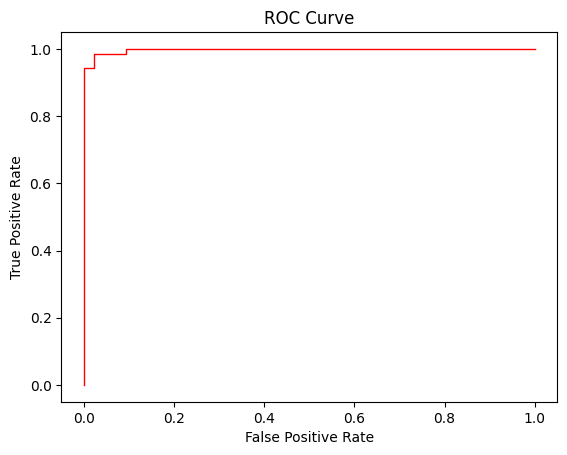

In [24]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## ROC curve (sklearn)

In [25]:
# Calculate the TPR and FPR using a Scikit Learn function.
FPR, TPR, cutoffs = metrics.roc_curve(y_test,y_pred_test_prob,pos_label=1)      # positive label = 1

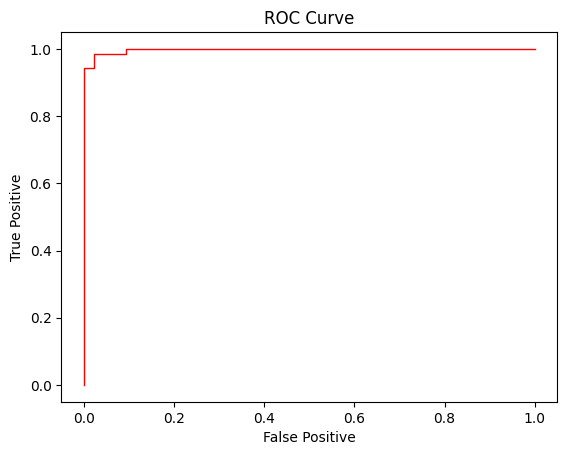

In [26]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

## Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [28]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(log_reg, X_train, y_train, cv=cv)
print('Cross validation scores:')
results

Cross validation scores:


array([0.93478261, 0.95652174, 0.97826087, 0.91304348, 0.97826087,
       0.97777778, 0.93333333, 0.95555556, 0.97777778, 0.93333333])

### stratified
To evenly distribute the target class ratio

In [29]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(log_reg, X_train, y_train, cv=cv)
print('Different Stratified cross val scores:')
results

Different Stratified cross val scores:


array([0.95652174, 1.        , 0.97826087, 0.89130435, 0.95652174,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.97777778])

## Learning Curve

In [30]:
import scikitplot as skplt

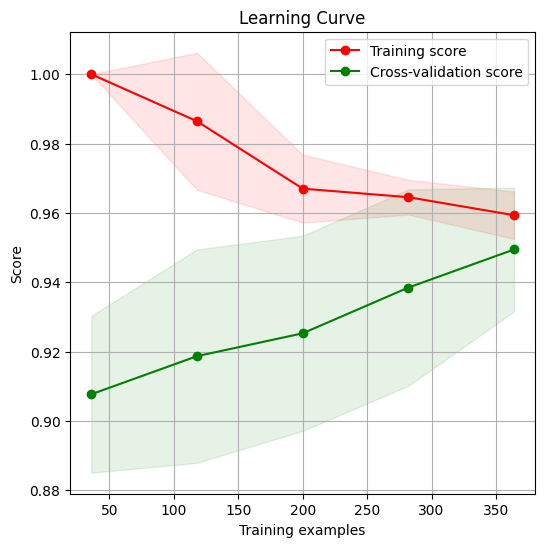

In [31]:
skplt.estimators.plot_learning_curve(log_reg, X_train, y_train, figsize=(6, 6))
plt.show()